In [1]:
import mediapipe as mp

In [2]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
import numpy as np
import pandas as pd


In [3]:
import torch as t
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler    

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert images to live image landmarks version:
Below takes in an array where each element is the file name of an image in the folder data/unlabled/. The script reads the image, runs a hand detection algorithm, then overlays the results and saves the output to the folder data/labeled/ with the original file name + "_marked.png"


TODO: Save the keypoints into a separate csv to create a training dataset

Now, we want the relative normalized coordinates of thes hand so it is invariant to location and image size!

In [5]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [6]:
len(alphabet)

26

## Feature Extractor Work

In [8]:
def get_features(path, labels, N_imgs):
    
    x_data = []
    
    y_data = []
    
    for lab in labels:
        with mp_hands.Hands(
            static_image_mode=True,
            max_num_hands=2,
            min_detection_confidence=0.5) as hands:
          for i in range(1,N_imgs):
            file = path + lab + '/'+ lab + str(i) + ".jpg"
            #print("iteration",idx,"file,",file)
            # Read an image, flip it around y-axis for correct handedness output (see
            # above).

            # image = cv2.flip(cv2.imread(file), 1)
            image = cv2.imread(file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Convert the BGR image to RGB before processing.
            results = hands.process(image)
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            # Extract the hand landmarks
            landmarks = []
            if results.multi_hand_landmarks:
                print('Sample ', i, 'of label ', lab)
                for hand_landmarks in results.multi_hand_landmarks:
                    # Get the bounding box of the hand
                    x_min, y_min, x_max, y_max = float('inf'), float('inf'), float('-inf'), float('-inf')
                    for landmark in hand_landmarks.landmark:
                        x, y = landmark.x, landmark.y
                        x_min = min(x_min, x)
                        y_min = min(y_min, y)
                        x_max = max(x_max, x)
                        y_max = max(y_max, y)

                    # Normalize the coordinates with respect to the bounding box of the hand
                    for landmark in hand_landmarks.landmark:
                        x, y, z = landmark.x, landmark.y, landmark.z
                        x_norm = (x - x_min) / (x_max - x_min)
                        y_norm = (y - y_min) / (y_max - y_min)
                        landmarks.append([x_norm, y_norm, z])
                                
                # Convert the landmarks to a feature vector
                feature_vector = np.array(landmarks).flatten()

                if feature_vector.shape[0] == 63: # Remove feature_vector of shape 126 due extra hand detection
                    # Print the feature vector
                    x_data.append(feature_vector)
                    y_data.append(alphabet.index(lab))
            
    return x_data, y_data

In [9]:
path = "asl_alphabet_train/asl_alphabet_train/"

labels_ = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

samples_per_symbol = 200

x_data, y_data = get_features(path, labels_, samples_per_symbol)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/Users/alban/opt/anaconda3/lib/python3.9/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Sample  1 of label  A
Sample  2 of label  A
Sample  3 of label  A
Sample  4 of label  A
Sample  5 of label  A
Sample  6 of label  A
Sample  7 of label  A
Sample  8 of label  A
Sample  9 of label  A
Sample  10 of label  A
Sample  11 of label  A
Sample  12 of label  A
Sample  13 of label  A
Sample  14 of label  A
Sample  15 of label  A
Sample  16 of label  A
Sample  17 of label  A
Sample  18 of label  A
Sample  19 of label  A
Sample  20 of label  A
Sample  21 of label  A
Sample  22 of label  A
Sample  23 of label  A
Sample  24 of label  A
Sample  25 of label  A
Sample  26 of label  A
Sample  27 of label  A
Sample  28 of label  A
Sample  29 of label  A
Sample  30 of label  A
Sample  31 of label  A
Sample  32 of label  A
Sample  33 of label  A
Sample  34 of label  A
Sample  35 of label  A
Sample  36 of label  A
Sample  37 of label  A
Sample  38 of label  A
Sample  39 of label  A
Sample  40 of label  A
Sample  41 of label  A
Sample  42 of label  A
Sample  43 of label  A
Sample  44 of label 

Sample  132 of label  D
Sample  133 of label  D
Sample  134 of label  D
Sample  135 of label  D
Sample  136 of label  D
Sample  137 of label  D
Sample  138 of label  D
Sample  139 of label  D
Sample  140 of label  D
Sample  141 of label  D
Sample  142 of label  D
Sample  143 of label  D
Sample  144 of label  D
Sample  145 of label  D
Sample  146 of label  D
Sample  147 of label  D
Sample  148 of label  D
Sample  149 of label  D
Sample  150 of label  D
Sample  151 of label  D
Sample  152 of label  D
Sample  153 of label  D
Sample  154 of label  D
Sample  155 of label  D
Sample  156 of label  D
Sample  157 of label  D
Sample  158 of label  D
Sample  159 of label  D
Sample  160 of label  D
Sample  161 of label  D
Sample  162 of label  D
Sample  163 of label  D
Sample  164 of label  D
Sample  165 of label  D
Sample  166 of label  D
Sample  167 of label  D
Sample  168 of label  D
Sample  169 of label  D
Sample  170 of label  D
Sample  171 of label  D
Sample  172 of label  D
Sample  173 of l

Sample  146 of label  G
Sample  147 of label  G
Sample  148 of label  G
Sample  149 of label  G
Sample  150 of label  G
Sample  151 of label  G
Sample  152 of label  G
Sample  153 of label  G
Sample  154 of label  G
Sample  155 of label  G
Sample  156 of label  G
Sample  157 of label  G
Sample  158 of label  G
Sample  159 of label  G
Sample  163 of label  G
Sample  164 of label  G
Sample  165 of label  G
Sample  166 of label  G
Sample  167 of label  G
Sample  168 of label  G
Sample  169 of label  G
Sample  170 of label  G
Sample  171 of label  G
Sample  172 of label  G
Sample  173 of label  G
Sample  174 of label  G
Sample  175 of label  G
Sample  179 of label  G
Sample  182 of label  G
Sample  183 of label  G
Sample  184 of label  G
Sample  186 of label  G
Sample  187 of label  G
Sample  188 of label  G
Sample  189 of label  G
Sample  190 of label  G
Sample  2 of label  H
Sample  3 of label  H
Sample  4 of label  H
Sample  5 of label  H
Sample  6 of label  H
Sample  7 of label  H
Samp

Sample  169 of label  I
Sample  170 of label  I
Sample  171 of label  I
Sample  172 of label  I
Sample  173 of label  I
Sample  174 of label  I
Sample  175 of label  I
Sample  176 of label  I
Sample  177 of label  I
Sample  178 of label  I
Sample  179 of label  I
Sample  180 of label  I
Sample  181 of label  I
Sample  182 of label  I
Sample  183 of label  I
Sample  184 of label  I
Sample  185 of label  I
Sample  186 of label  I
Sample  187 of label  I
Sample  188 of label  I
Sample  189 of label  I
Sample  190 of label  I
Sample  191 of label  I
Sample  192 of label  I
Sample  193 of label  I
Sample  194 of label  I
Sample  195 of label  I
Sample  196 of label  I
Sample  197 of label  I
Sample  198 of label  I
Sample  199 of label  I
Sample  1 of label  J
Sample  2 of label  J
Sample  3 of label  J
Sample  4 of label  J
Sample  5 of label  J
Sample  6 of label  J
Sample  7 of label  J
Sample  8 of label  J
Sample  9 of label  J
Sample  10 of label  J
Sample  11 of label  J
Sample  12 o

Check if no empty array

In [10]:
ii = 0
for el in x_data:
    if el == []:
        ii += 1
print(ii)

0


/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_10754/163972605.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if el == []:


In [11]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [12]:
def to_categorical(y, num_classes=None, dtype="float32"):
    # Comes from Keras library
    y = np.array(y, dtype="int")
    input_shape = y.shape

    # Shrink the last dimension if the shape is (..., 1).
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])

    y = y.reshape(-1)
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

In [13]:
#y_data = to_categorical(y_data).astype(int)
y_data = y_data.astype(int)

In [14]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [16]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [17]:
train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [18]:
EPOCHS = 30
BATCH_SIZE = 4
LEARNING_RATE = 0.0007
NUM_FEATURES = x_data.shape[1]
NUM_CLASSES = len(labels_)

In [19]:
NUM_CLASSES

10

In [20]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [21]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [23]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=63, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [24]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [25]:
print("Begin training.")
for e in range(1, EPOCHS+1):
    
    print(e)
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
                
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))

                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} ')

Begin training.
1
Epoch 001: | Train Loss: 1.16584 | Val Loss: 0.40220 
2
Epoch 002: | Train Loss: 0.59148 | Val Loss: 0.21152 
3
Epoch 003: | Train Loss: 0.40657 | Val Loss: 0.15103 
4
Epoch 004: | Train Loss: 0.30966 | Val Loss: 0.10330 
5
Epoch 005: | Train Loss: 0.25010 | Val Loss: 0.08728 
6
Epoch 006: | Train Loss: 0.21549 | Val Loss: 0.05871 
7
Epoch 007: | Train Loss: 0.16663 | Val Loss: 0.06824 
8
Epoch 008: | Train Loss: 0.16434 | Val Loss: 0.05524 
9
Epoch 009: | Train Loss: 0.12825 | Val Loss: 0.04594 
10
Epoch 010: | Train Loss: 0.10700 | Val Loss: 0.04390 
11
Epoch 011: | Train Loss: 0.09088 | Val Loss: 0.03618 
12
Epoch 012: | Train Loss: 0.07543 | Val Loss: 0.02250 
13
Epoch 013: | Train Loss: 0.08200 | Val Loss: 0.03506 
14
Epoch 014: | Train Loss: 0.07009 | Val Loss: 0.01326 
15
Epoch 015: | Train Loss: 0.06375 | Val Loss: 0.01369 
16
Epoch 016: | Train Loss: 0.06968 | Val Loss: 0.02561 
17
Epoch 017: | Train Loss: 0.04915 | Val Loss: 0.01059 
18
Epoch 018: | Train Lo

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

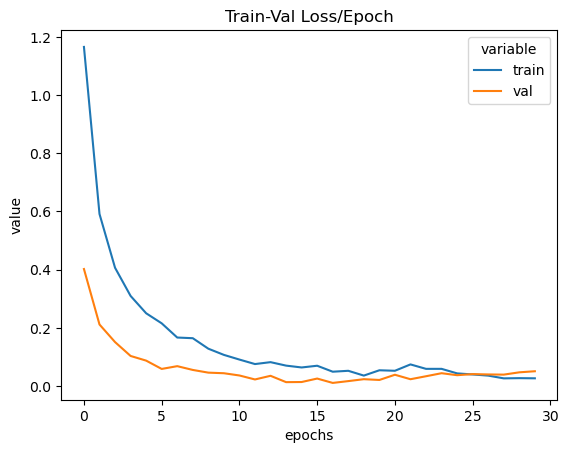

In [26]:
# Create dataframes
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

Save model

In [36]:
torch.save(model.state_dict(), './model.pth')

Load model

In [38]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)
model.load_state_dict(torch.load('./model.pth'))
model.eval()

MulticlassClassification(
  (layer_1): Linear(in_features=63, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [39]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [40]:
y_pred_list

[8,
 8,
 6,
 5,
 9,
 5,
 2,
 9,
 8,
 8,
 6,
 9,
 7,
 3,
 6,
 8,
 2,
 5,
 3,
 6,
 2,
 7,
 9,
 8,
 9,
 6,
 7,
 2,
 5,
 0,
 9,
 0,
 5,
 7,
 0,
 2,
 8,
 3,
 6,
 8,
 9,
 8,
 2,
 8,
 0,
 2,
 2,
 6,
 9,
 5,
 3,
 6,
 5,
 3,
 5,
 5,
 2,
 0,
 6,
 8,
 6,
 2,
 8,
 9,
 8,
 3,
 0,
 8,
 3,
 2,
 9,
 6,
 8,
 1,
 0,
 8,
 2,
 3,
 8,
 3,
 5,
 3,
 6,
 8,
 5,
 3,
 7,
 6,
 0,
 5,
 6,
 9,
 8,
 3,
 5,
 5,
 7,
 2,
 3,
 9,
 7,
 7,
 9,
 5,
 7,
 8,
 7,
 9,
 3,
 8,
 6,
 7,
 3,
 7,
 4,
 9,
 5,
 7,
 3,
 9,
 5,
 6,
 7,
 7,
 3,
 2,
 2,
 2,
 2,
 6,
 7,
 2,
 5,
 6,
 7,
 3,
 7,
 7,
 5,
 8,
 3,
 3,
 0,
 6,
 3,
 5,
 0,
 9,
 9,
 7,
 9,
 9,
 2,
 5,
 9,
 7,
 2,
 2,
 5,
 5,
 8,
 9,
 6,
 2,
 6,
 2,
 5,
 9,
 8,
 3,
 3,
 3,
 8,
 9,
 9,
 7,
 9,
 5,
 2,
 8,
 9,
 3,
 8,
 2,
 7,
 0,
 2,
 0,
 6,
 7,
 9,
 8,
 2,
 7,
 0,
 1,
 5,
 9,
 3,
 5,
 5,
 5,
 9,
 2,
 8,
 9,
 6,
 6,
 8,
 8,
 4,
 2,
 3,
 8,
 5,
 8,
 0,
 2,
 7,
 7,
 7,
 3,
 9,
 8,
 9,
 8,
 3,
 6,
 3,
 7,
 3,
 6,
 2,
 3,
 7,
 9,
 9,
 5,
 1,
 8,
 9,
 5,
 5,
 9,
 8,
 5,
 3,
 9,
 8,
 9,


In [29]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        35
           6       1.00      0.96      0.98        27
           7       0.97      1.00      0.98        30
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [30]:
y_pred_list

[8,
 8,
 6,
 5,
 9,
 5,
 2,
 9,
 8,
 8,
 6,
 9,
 7,
 3,
 6,
 8,
 2,
 5,
 3,
 6,
 2,
 7,
 9,
 8,
 9,
 6,
 7,
 2,
 5,
 0,
 9,
 0,
 5,
 7,
 0,
 2,
 8,
 3,
 6,
 8,
 9,
 8,
 2,
 8,
 0,
 2,
 2,
 6,
 9,
 5,
 3,
 6,
 5,
 3,
 5,
 5,
 2,
 0,
 6,
 8,
 6,
 2,
 8,
 9,
 8,
 3,
 0,
 8,
 3,
 2,
 9,
 6,
 8,
 1,
 0,
 8,
 2,
 3,
 8,
 3,
 5,
 3,
 6,
 8,
 5,
 3,
 7,
 6,
 0,
 5,
 6,
 9,
 8,
 3,
 5,
 5,
 7,
 2,
 3,
 9,
 7,
 7,
 9,
 5,
 7,
 8,
 7,
 9,
 3,
 8,
 6,
 7,
 3,
 7,
 4,
 9,
 5,
 7,
 3,
 9,
 5,
 6,
 7,
 7,
 3,
 2,
 2,
 2,
 2,
 6,
 7,
 2,
 5,
 6,
 7,
 3,
 7,
 7,
 5,
 8,
 3,
 3,
 0,
 6,
 3,
 5,
 0,
 9,
 9,
 7,
 9,
 9,
 2,
 5,
 9,
 7,
 2,
 2,
 5,
 5,
 8,
 9,
 6,
 2,
 6,
 2,
 5,
 9,
 8,
 3,
 3,
 3,
 8,
 9,
 9,
 7,
 9,
 5,
 2,
 8,
 9,
 3,
 8,
 2,
 7,
 0,
 2,
 0,
 6,
 7,
 9,
 8,
 2,
 7,
 0,
 1,
 5,
 9,
 3,
 5,
 5,
 5,
 9,
 2,
 8,
 9,
 6,
 6,
 8,
 8,
 4,
 2,
 3,
 8,
 5,
 8,
 0,
 2,
 7,
 7,
 7,
 3,
 9,
 8,
 9,
 8,
 3,
 6,
 3,
 7,
 3,
 6,
 2,
 3,
 7,
 9,
 9,
 5,
 1,
 8,
 9,
 5,
 5,
 9,
 8,
 5,
 3,
 9,
 8,
 9,


Let us try with one example

In [31]:
path_test = "./DataKaggle/archive/asl_alphabet_test/asl_alphabet_test/"

In [32]:
lab = 'J'
file = path_test + lab + "_test.jpg"

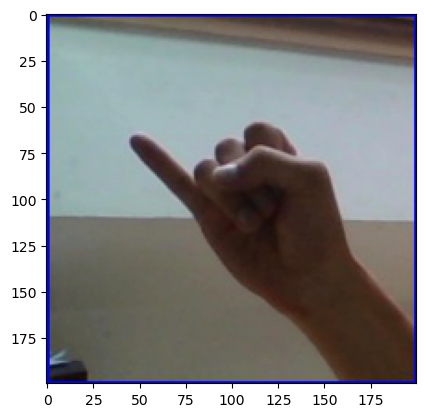

In [33]:
from matplotlib import image as mpimg

image = mpimg.imread(file)
plt.imshow(image)
plt.show()

In [35]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
        model_complexity=0,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
          print("Ignoring empty camera frame.")
          # If loading a video, use 'break' instead of 'continue'.
          continue

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        landmarks = []
        letter = ''
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
                
                # Get the bounding box of the hand
                x_min, y_min, x_max, y_max = float('inf'), float('inf'), float('-inf'), float('-inf')
                for landmark in hand_landmarks.landmark:
                    x, y = landmark.x, landmark.y
                    x_min = min(x_min, x)
                    y_min = min(y_min, y)
                    x_max = max(x_max, x)
                    y_max = max(y_max, y)

                # Normalize the coordinates with respect to the bounding box of the hand
                for landmark in hand_landmarks.landmark:
                    x, y, z = landmark.x, landmark.y, landmark.z
                    x_norm = (x - x_min) / (x_max - x_min)
                    y_norm = (y - y_min) / (y_max - y_min)
                    landmarks.append([x_norm, y_norm, z])

            # Convert the landmarks to a feature vector
            x_t = np.array(landmarks).flatten()
            
            
            y_pred_list = []
            
            
            if x_t.shape[0] == 63:

            
                with torch.no_grad():
                    model.eval()
                    X_batch  = torch.from_numpy(np.array([x_t])).float()
                    X_batch = X_batch.to(device)
                    y_test_pred = model(X_batch)
                    _, y_pred_tags = torch.max(y_test_pred, dim = 1)

                    y_pred_list.append(y_pred_tags.cpu().numpy())
                y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
                
                letter = alphabet[y_pred_list[0]]

                #y_pred_list = np.argmax(y_pred_list, axis=1)

        # Flip the image horizontally for a selfie-view display.
        
        
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (100,50)
        fontScale              = 1
        fontColor              = (0,0,0)
        thickness              = 4
        lineType               = 2

        image = cv2.putText(cv2.flip(image, 1),letter, 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
        
        #cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
        
        cv2.imshow('MediaPipe Hands', image)
            
        
        if cv2.waitKey(5) & 0xFF == ord('q'):
            print("hey")
            cap.release()
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            break


hey
